In [77]:
#Importing Necessary Libraries
import math
import matplotlib.pyplot as plt
import numpy as np

## TASK 1

In [78]:
#Importing Training and Testing data
training_data_path = "training_data.txt"
test_data_path = "test_data.txt"


with open(training_data_path, 'r') as file:
    training_data = file.read().split()


with open(test_data_path, 'r') as file:
    test_data = file.read().split()

N_train = len(training_data)  
N_test = len(test_data) 

print(N_train)
print(N_test)

640000
640000


In [79]:
#Defining the count function for counting the word frequencies in the given data
def count(data):
    word_counts = {}
    for word in data:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts
#Creating a vocabulary by combining the distinct values from both training and testing data 
vocab = set(training_data).union(set(test_data))
K = len(vocab)
print(f"Vocabulary Size: {K}")#size of the vocabulary is 9999

Vocabulary Size: 9999


In [80]:
#defining the prplexity function to calculate the perplexities for the probabilities
def perplexity(data, prob, N):
    log_prob_sum = 0
        
    for word in data:
        if word in prob and prob[word] > 0:
            log_prob_sum += np.log(prob[word])
    perplexity_value = np.exp(-(1 / N) * log_prob_sum) 
   
    return perplexity_value

In [81]:
#defining the Maximum Liklihood function 
def mle(word_counts,vocab):
    wordcount = []
    for word in vocab:
        if word in word_counts.keys():
            wordcount.append(word_counts[word])
        else:
            wordcount.append(0) 
    wordcount=np.array(wordcount)
    total_words = np.sum(list(word_counts.values()))
    word_probability = wordcount/float(total_words)
    word_probabilities= {word: prob for word, prob in zip(vocab, word_probability)}
    return word_probabilities


In [82]:
#defining the MAP Estimate function
def map(word_counts,alpha_prime,K,vocab):
    wordcount = []
    for word in vocab:
        if word in word_counts.keys():
            wordcount.append(word_counts[word])
        else:
            wordcount.append(0) 
    wordcount=np.array(wordcount)
    total_words = np.sum(list(word_counts.values()))
    map_probabilities = {word: (count + alpha_prime - 1) / (total_words + (alpha_prime * K) - K)
                         for word, count in zip(vocab, wordcount)}  
    return map_probabilities


In [83]:
#defining the Predictive Distribution function
def pd(word_counts,alpha_prime,K,vocab):
    wordcount = []
    for word in vocab:
        if word in word_counts.keys():
            wordcount.append(word_counts[word])
        else:
            wordcount.append(0) 
    wordcount=np.array(wordcount)
    total_words = np.sum(list(word_counts.values()))
    pd_probabilities = {}
    for word in vocab:
        count = word_counts.get(word, 0)
        pd_probabilities[word] = (count + alpha_prime) / (total_words + alpha_prime * K)
    return pd_probabilities



In [84]:
#finding the perplexities of MLE, MAP and Predictive Distribution for both training and testing data.
word_counts=count(training_data)
word_probabilities= mle(word_counts,vocab)

word_counts=count(training_data)
map_probabilities=map(word_counts,2,K,vocab)

word_counts=count(training_data)
pred=pd(word_counts,2,K,vocab)


print("Perplexity on the test data(mle):", perplexity(test_data,word_probabilities,N_test))
print("Perplexity on the training data(mle):", perplexity(training_data,word_probabilities,N_train))


print("Perplexity on the test data(map):", perplexity(test_data,map_probabilities,N_test))
print("Perplexity on the training data (MAP):", perplexity(training_data,map_probabilities,N_train))


print("Perplexity on the test data(pd):", perplexity(test_data,pred,N_test))
print("Perplexity on the training data (pd):", perplexity(training_data,pred,N_train))

Perplexity on the test data(mle): 8612.346410622118
Perplexity on the training data(mle): 8476.454149008498
Perplexity on the test data(map): 8609.536150969845
Perplexity on the training data (MAP): 8477.001545621864
Perplexity on the test data(pd): 8607.971360465888
Perplexity on the training data (pd): 8478.501171717822


In [85]:
#calculating the perplexities of MLE, MAP and Predictive Distribution for all training sizes.
trainsizes = [N_train // 128, N_train // 64, N_train // 16, N_train // 4, N_train]
perplexities = {'MLE': [], 'MAP': [], 'Predictive': []}
for size in trainsizes:
    subset_training_data = training_data[:size]
    subset_word_counts = count(subset_training_data)
    mle_probs = mle(subset_word_counts,vocab)
    perplexities['MLE'].append({
        'train': perplexity( subset_training_data,mle_probs, size),
        'test': perplexity( test_data,mle_probs, N_test)
    })
    map_probs = map(subset_word_counts, 2,K,vocab) 
    perplexities['MAP'].append({
        'train': perplexity( subset_training_data,map_probs, size),
        'test': perplexity( test_data,map_probs, N_test)
    })
    pred_probs = pd(subset_word_counts, 2,K,vocab)
    perplexities['Predictive'].append({
        'train': perplexity( subset_training_data,pred_probs, size),
        'test': perplexity( test_data,pred_probs, N_test)
    })
#printing the Size and Perplexity of all MLE, MAP and Predictive Distribution for each training sizes
    print(size,'mle', {
            'train': perplexity( subset_training_data,mle_probs, size),
            'test': perplexity( test_data,mle_probs, N_test)
        })
    print(size,'map' ,{
            'train': perplexity( subset_training_data,map_probs, size),
            'test': perplexity( test_data,map_probs, N_test)
        })
    print(size,'pd', {
            'train': perplexity( subset_training_data,pred_probs, size),
            'test': perplexity( test_data,pred_probs, N_test)
        })


5000 mle {'train': 3337.6905243972765, 'test': 42.70656178658583}
5000 map {'train': 5850.778971151943, 'test': 10106.87617288602}
5000 pd {'train': 6953.9271187232, 'test': 9812.377969466665}
10000 mle {'train': 5010.339877613582, 'test': 391.9466354641216}
10000 map {'train': 6452.848785059833, 'test': 10004.357699410373}
10000 pd {'train': 7226.359473656668, 'test': 9677.335643949902}
40000 mle {'train': 7462.089806839892, 'test': 6577.391782846188}
40000 map {'train': 7653.887928365619, 'test': 9338.59632769385}
40000 pd {'train': 7851.680181986443, 'test': 9191.114889275803}
160000 mle {'train': 8276.399199722386, 'test': 8765.119399861253}
160000 map {'train': 8286.92339377225, 'test': 8800.537803098856}
160000 pd {'train': 8308.036952804405, 'test': 8779.915214573752}
640000 mle {'train': 8476.454149008498, 'test': 8612.346410622118}
640000 map {'train': 8477.001545621864, 'test': 8609.536150969845}
640000 pd {'train': 8478.501171717822, 'test': 8607.971360465888}


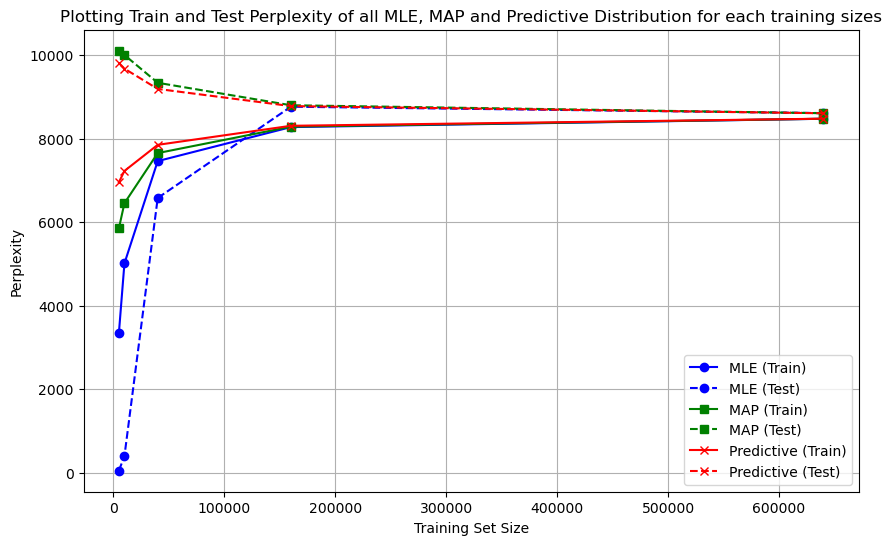

In [86]:
#Plotting Train and Test Perplexity of all MLE, MAP and Predictive Distribution for each training sizes
trainsizes = [N_train // 128, N_train // 64, N_train // 16, N_train // 4, N_train]

mle_train_perplexities = [p['train'] for p in perplexities['MLE']]
mle_test_perplexities = [p['test'] for p in perplexities['MLE']]

map_train_perplexities = [p['train'] for p in perplexities['MAP']]
map_test_perplexities = [p['test'] for p in perplexities['MAP']]

predictive_train_perplexities = [p['train'] for p in perplexities['Predictive']]
predictive_test_perplexities = [p['test'] for p in perplexities['Predictive']]

plt.figure(figsize=(10, 6))

plt.plot(trainsizes, mle_train_perplexities, label='MLE (Train)', marker='o', color='blue')
plt.plot(trainsizes, mle_test_perplexities, label='MLE (Test)', marker='o', linestyle='--', color='blue')

plt.plot(trainsizes, map_train_perplexities, label='MAP (Train)', marker='s', color='green')
plt.plot(trainsizes, map_test_perplexities, label='MAP (Test)', marker='s', linestyle='--', color='green')

plt.plot(trainsizes, predictive_train_perplexities, label='Predictive (Train)', marker='x', color='red')
plt.plot(trainsizes, predictive_test_perplexities, label='Predictive (Test)', marker='x', linestyle='--', color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Perplexity')
plt.title('Plotting Train and Test Perplexity of all MLE, MAP and Predictive Distribution for each training sizes')

plt.legend()

plt.grid(True)
plt.show()


## TASK 2

In [87]:
#Defining the evidence function
def log_evidence(word_counts,alpha_prime, K,vocab):
    alpha_0 = K*alpha_prime
    N = sum(word_counts.values())
    wordcount = []
    for word in vocab:
        if word in word_counts.keys():
            wordcount.append(word_counts[word])
        else:
            wordcount.append(0) 
    wordcount=np.array(wordcount)
    gamma= np.vectorize(math.lgamma)
    term1 = math.lgamma(alpha_0) + np.sum(gamma(alpha_prime + wordcount))
    term2 = math.lgamma(alpha_0 + N) + (np.sum(gamma(alpha_prime))*K)
    log_evidence_value = term1 - term2
    return log_evidence_value

Alpha': 1.0, Log Evidence: -46065.89123658223, Test Perplexity: 10106.87617288602
Alpha': 2.0, Log Evidence: -45984.13830041842, Test Perplexity: 9812.377969466665
Alpha': 3.0, Log Evidence: -45979.971522014355, Test Perplexity: 9781.819893409234
Alpha': 4.0, Log Evidence: -45985.382938884315, Test Perplexity: 9790.735045741803
Alpha': 5.0, Log Evidence: -45991.75938990922, Test Perplexity: 9806.788080085755
Alpha': 6.0, Log Evidence: -45997.54641109961, Test Perplexity: 9822.951019589294
Alpha': 7.0, Log Evidence: -46002.522107508965, Test Perplexity: 9837.574552009928
Alpha': 8.0, Log Evidence: -46006.7542261763, Test Perplexity: 9850.41049892009
Alpha': 9.0, Log Evidence: -46010.36192120728, Test Perplexity: 9861.593955158507
Alpha': 10.0, Log Evidence: -46013.45756136952, Test Perplexity: 9871.34685581668


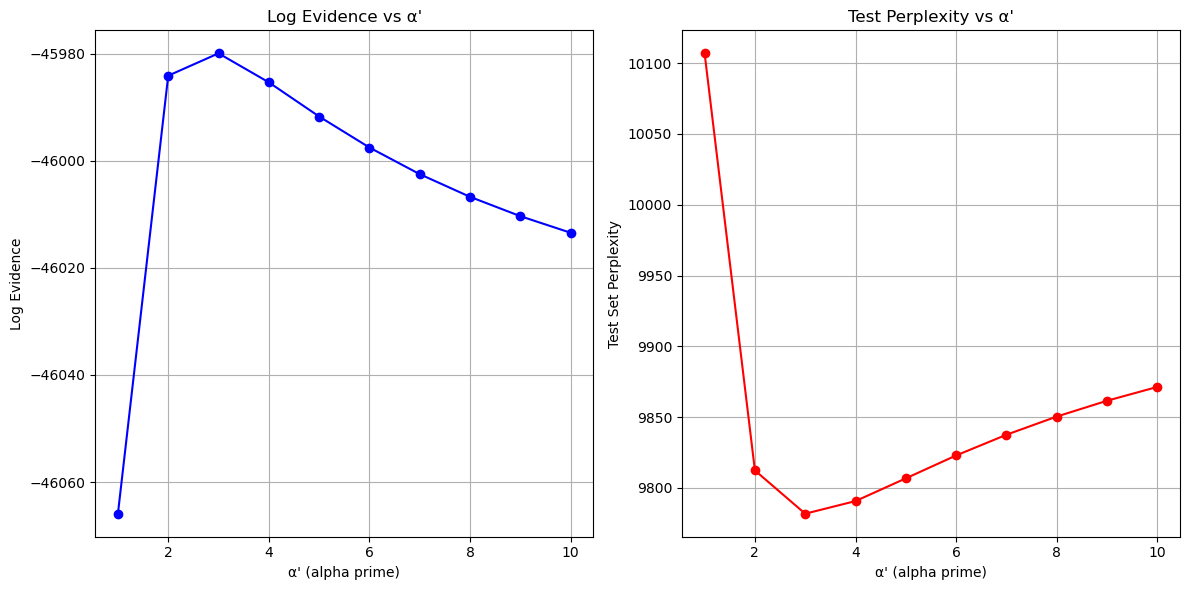

In [88]:
#Calculating the log-evidence and perplexity values for each α'
train_size = N_train // 128
sampled_training_data = training_data[:train_size]
alpha = np.arange(1.0, 11.0, 1.0)
log_evidence_values = []
perplexity_values = []
word_counts = count(sampled_training_data)  
for alpha_prime in alpha:
    
    pred = pd(word_counts, alpha_prime, K,vocab)  
    test_perplexity = perplexity(test_data, pred, N_test)
    perplexity_values.append(test_perplexity)
    
    log_ev = log_evidence(word_counts, alpha_prime, K,vocab)
    log_evidence_values.append(log_ev)
    
    
    print(f"Alpha': {alpha_prime}, Log Evidence: {log_ev}, Test Perplexity: {test_perplexity}")

#Plotting the log-evidence and perplexity values against α'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(alpha, log_evidence_values, marker='o', color='b')
plt.title("Log Evidence vs α'")
plt.xlabel("α' (alpha prime)")
plt.ylabel("Log Evidence")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(alpha, perplexity_values, marker='o', color='r')
plt.title("Test Perplexity vs α'")
plt.xlabel("α' (alpha prime)")
plt.ylabel("Test Set Perplexity")
plt.grid(True)

plt.tight_layout()
plt.show()


## TASK 3

In [89]:
#Importing the files and creating a vocabulary by combining the distinct values from all the files 
data1 = "pg345.txt.clean"
data2 = "pg84.txt.clean"
data3 = "pg1188.txt.clean"

with open(data1, 'r') as file:
    data1 = file.read().split()


with open(data2, 'r') as file:
    data2 = file.read().split()
    
with open(data3, 'r') as file:
    data3 = file.read().split()
    
vocab2 = set(data1).union(set(data2)).union(set(data3))
K2 = len(vocab2)
print(f"Vocabulary Size: {K2}")
    

Vocabulary Size: 16411


In [90]:
#Calculating the PD for file pg345
word_counts_345 = count(data1)
pred_345 = pd(word_counts_345, 2, K2,vocab2)
#Calculating the perplexity for file pg84 and pg118 using the PD probability found using file pg345
perplexity_84 = perplexity(data2, pred_345, len(data2))
perplexity_1188 = perplexity(data3, pred_345,len(data3))
print(f"Perplexity on pg1188.txt.clean (same author): {perplexity_1188}")
print(f"Perplexity on pg84.txt.clean (different author): {perplexity_84}")

Perplexity on pg1188.txt.clean (same author): 5864.256928400647
Perplexity on pg84.txt.clean (different author): 8270.556453793237
